Import section of the libraraies to be used in the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import shap
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
#Loading datatset as pandas dataframe
df = pd.read_csv('GlobalWeatherRepository.csv')

In [7]:
#Printing dataset features and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49306 entries, 0 to 49305
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49306 non-null  object 
 1   location_name                 49306 non-null  object 
 2   latitude                      49306 non-null  float64
 3   longitude                     49306 non-null  float64
 4   timezone                      49306 non-null  object 
 5   last_updated_epoch            49306 non-null  int64  
 6   last_updated                  49306 non-null  object 
 7   temperature_celsius           49306 non-null  float64
 8   temperature_fahrenheit        49306 non-null  float64
 9   condition_text                49306 non-null  object 
 10  wind_mph                      49306 non-null  float64
 11  wind_kph                      49306 non-null  float64
 12  wind_degree                   49306 non-null  int64  
 13  w

In [9]:
#printing few rows of dataset
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [11]:
#Data Cleaning and Prepocessing (Basic)
#checking for missing values (outliers) 
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

In [13]:
#checking for empty strings 
empty_strings = (df == "").sum()
print("Empty Strings:\n", empty_strings)

Empty Strings:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               

In [15]:
# Drop rows/columns with excessive missing values if necessary
# Example: Remove rows with missing values (modify as per requirements)
df = df.dropna()

Exploratory Data Analysis (Basic and Advanced) 

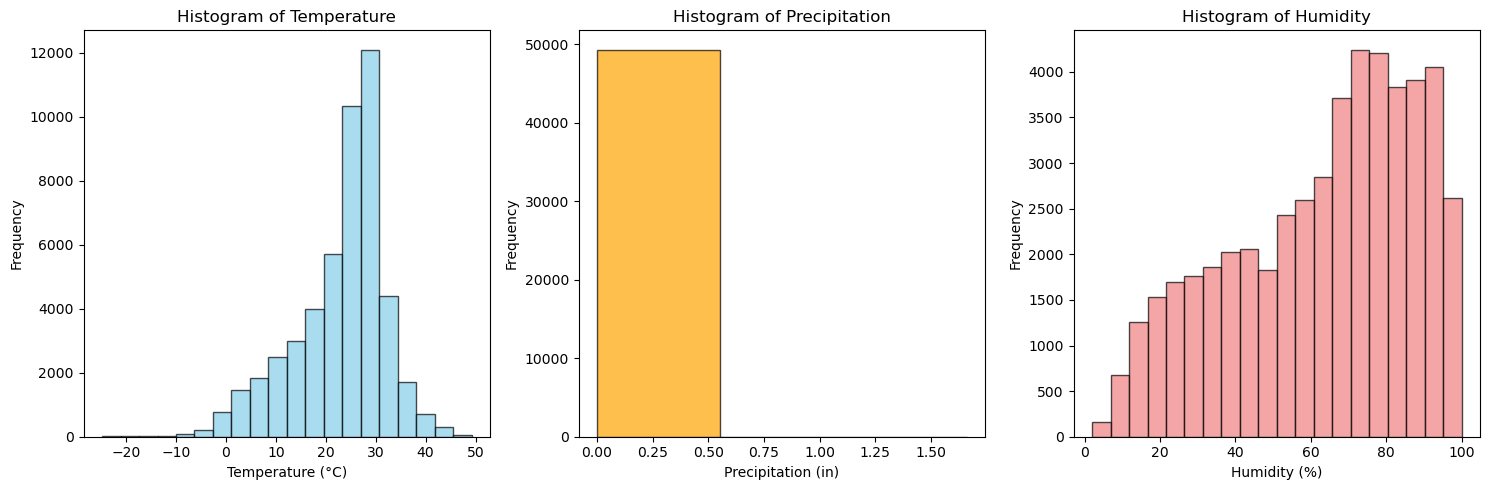

In [29]:
# Distribution of temperature, humdidty and precipitation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for Temperature
axes[0].hist(df['temperature_celsius'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Histogram of Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Frequency')

# Plot histogram for Precipitation
axes[1].hist(df['precip_in'], bins=3, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Histogram of Precipitation')
axes[1].set_xlabel('Precipitation (in)')
axes[1].set_ylabel('Frequency')

# Plot histogram for Humidity
axes[2].hist(df['humidity'], bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
axes[2].set_title('Histogram of Humidity')
axes[2].set_xlabel('Humidity (%)')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a PNG image
plt.savefig('temperature_humidity_precipitation_histograms.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

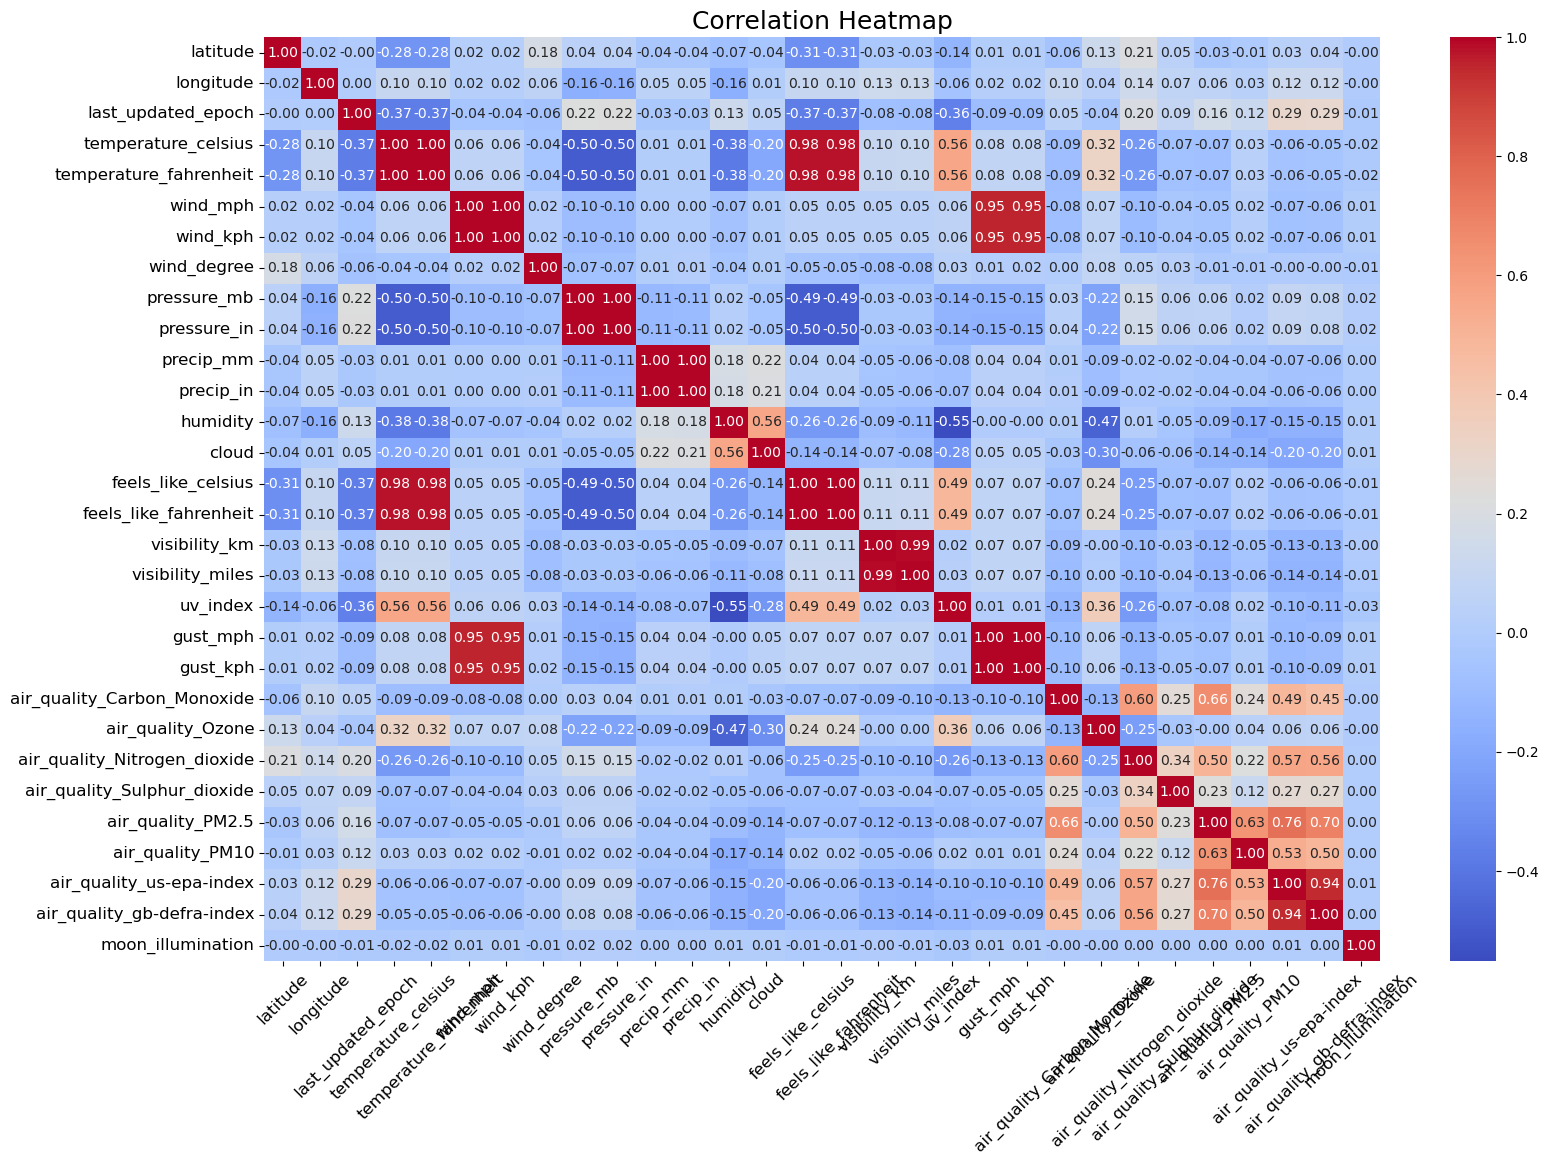

In [31]:
#Plotting correlation heatmap of all the features with each other
# Select only numerical columns from df
numerical_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(18, 12))  # Increase width and height of the plot
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12, rotation=0)   # Keep y-axis labels horizontal

# Save the plot as a PNG image
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

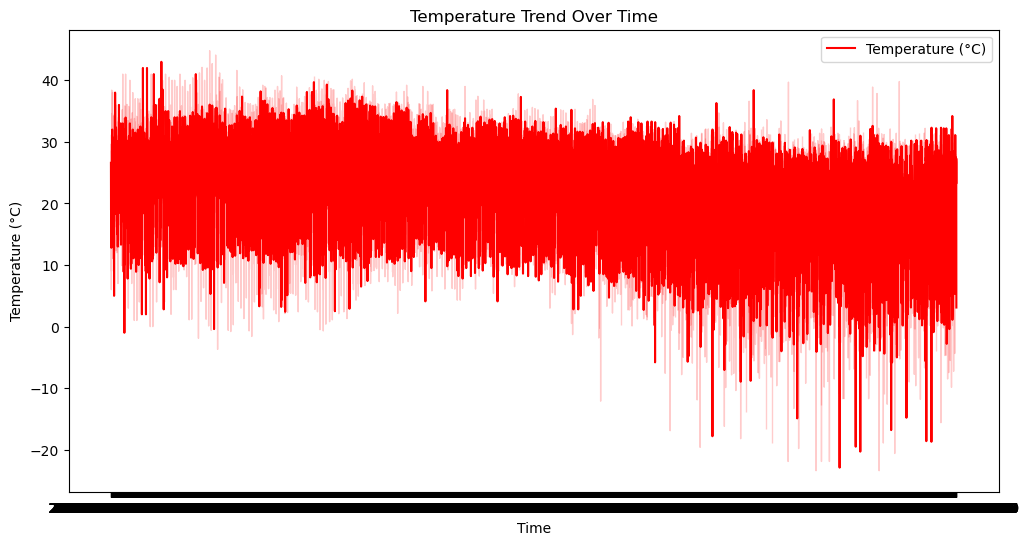

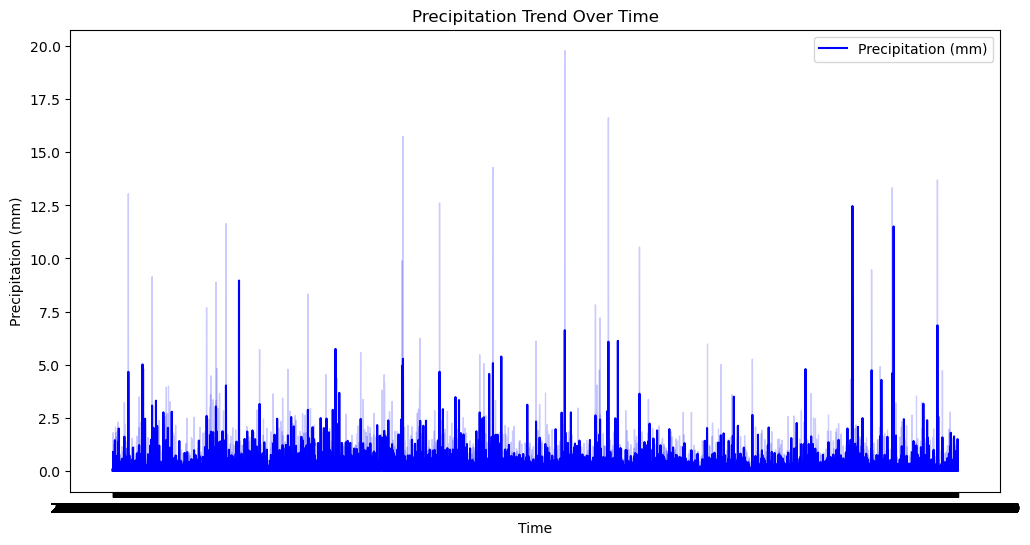

In [35]:
# Temperature Trends Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', label='Temperature (°C)', color='red')
plt.title("Temperature Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()

# Save the Temperature Trends plot as a PNG image
plt.savefig('temperature_trend.png', dpi=300, bbox_inches='tight')

# Show the Temperature Trends plot
plt.show()

# Precipitation Trends Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='last_updated', y='precip_mm', label='Precipitation (mm)', color='blue')
plt.title("Precipitation Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.legend()

# Save the Precipitation Trends plot as a PNG image
plt.savefig('precipitation_trend.png', dpi=300, bbox_inches='tight')

# Show the Precipitation Trends plot
plt.show()

In [36]:
# Compute the correlation matrix and print the highest correlated feature for each of the features in dataset
corr_matrix = numerical_df.corr()

# Iterate over each feature to find its highest correlated feature
for feature in corr_matrix.columns:
    # Get the correlations for the current feature, excluding itself
    feature_corr = corr_matrix[feature].drop(feature)
    
    # Get the feature with the highest correlation and the correlation value
    max_corr_feature = feature_corr.idxmax()
    max_corr_value = feature_corr.max()
    
    # Print the result
    print(f"Feature: {feature} | Highest Correlated Feature: {max_corr_feature} | Correlation: {max_corr_value:.2f}")


Feature: latitude | Highest Correlated Feature: air_quality_Nitrogen_dioxide | Correlation: 0.21
Feature: longitude | Highest Correlated Feature: air_quality_Nitrogen_dioxide | Correlation: 0.14
Feature: last_updated_epoch | Highest Correlated Feature: air_quality_us-epa-index | Correlation: 0.29
Feature: temperature_celsius | Highest Correlated Feature: temperature_fahrenheit | Correlation: 1.00
Feature: temperature_fahrenheit | Highest Correlated Feature: temperature_celsius | Correlation: 1.00
Feature: wind_mph | Highest Correlated Feature: wind_kph | Correlation: 1.00
Feature: wind_kph | Highest Correlated Feature: wind_mph | Correlation: 1.00
Feature: wind_degree | Highest Correlated Feature: latitude | Correlation: 0.18
Feature: pressure_mb | Highest Correlated Feature: pressure_in | Correlation: 1.00
Feature: pressure_in | Highest Correlated Feature: pressure_mb | Correlation: 1.00
Feature: precip_mm | Highest Correlated Feature: precip_in | Correlation: 1.00
Feature: precip_in 

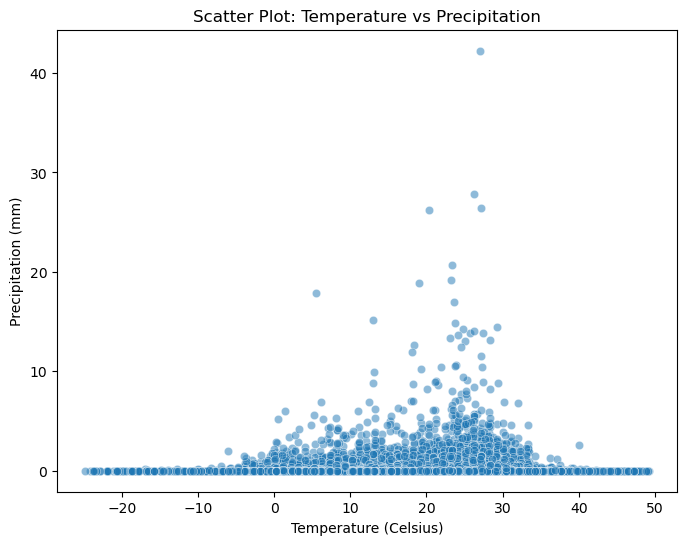

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='precip_mm', data=df, alpha=0.5)
plt.title('Scatter Plot: Temperature vs Precipitation')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Precipitation (mm)')
plt.show()

In [41]:
#EDA 
# Summary statistics for numeric columns
print(df.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  49306.000000  49306.000000        4.930600e+04         49306.000000   
mean      19.141099     22.204507        1.726835e+09            22.983448   
std       24.481050     65.790256        6.386538e+06             9.197991   
min      -41.300000   -175.200000        1.715849e+09           -24.800000   
25%        3.750000     -6.250000        1.721220e+09            18.200000   
50%       17.250000     23.320000        1.726916e+09            25.300000   
75%       40.400000     50.580000        1.732352e+09            29.000000   
max       64.150000    179.220000        1.737801e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            49306.000000  49306.000000  49306.000000  49306.000000   
mean                73.371667      8.283099     13.334375    170.904048   
std                 16.556286      9.843174     15.839786    103.179298 

Unique Analysis: Climate Aanalysis for different regions 

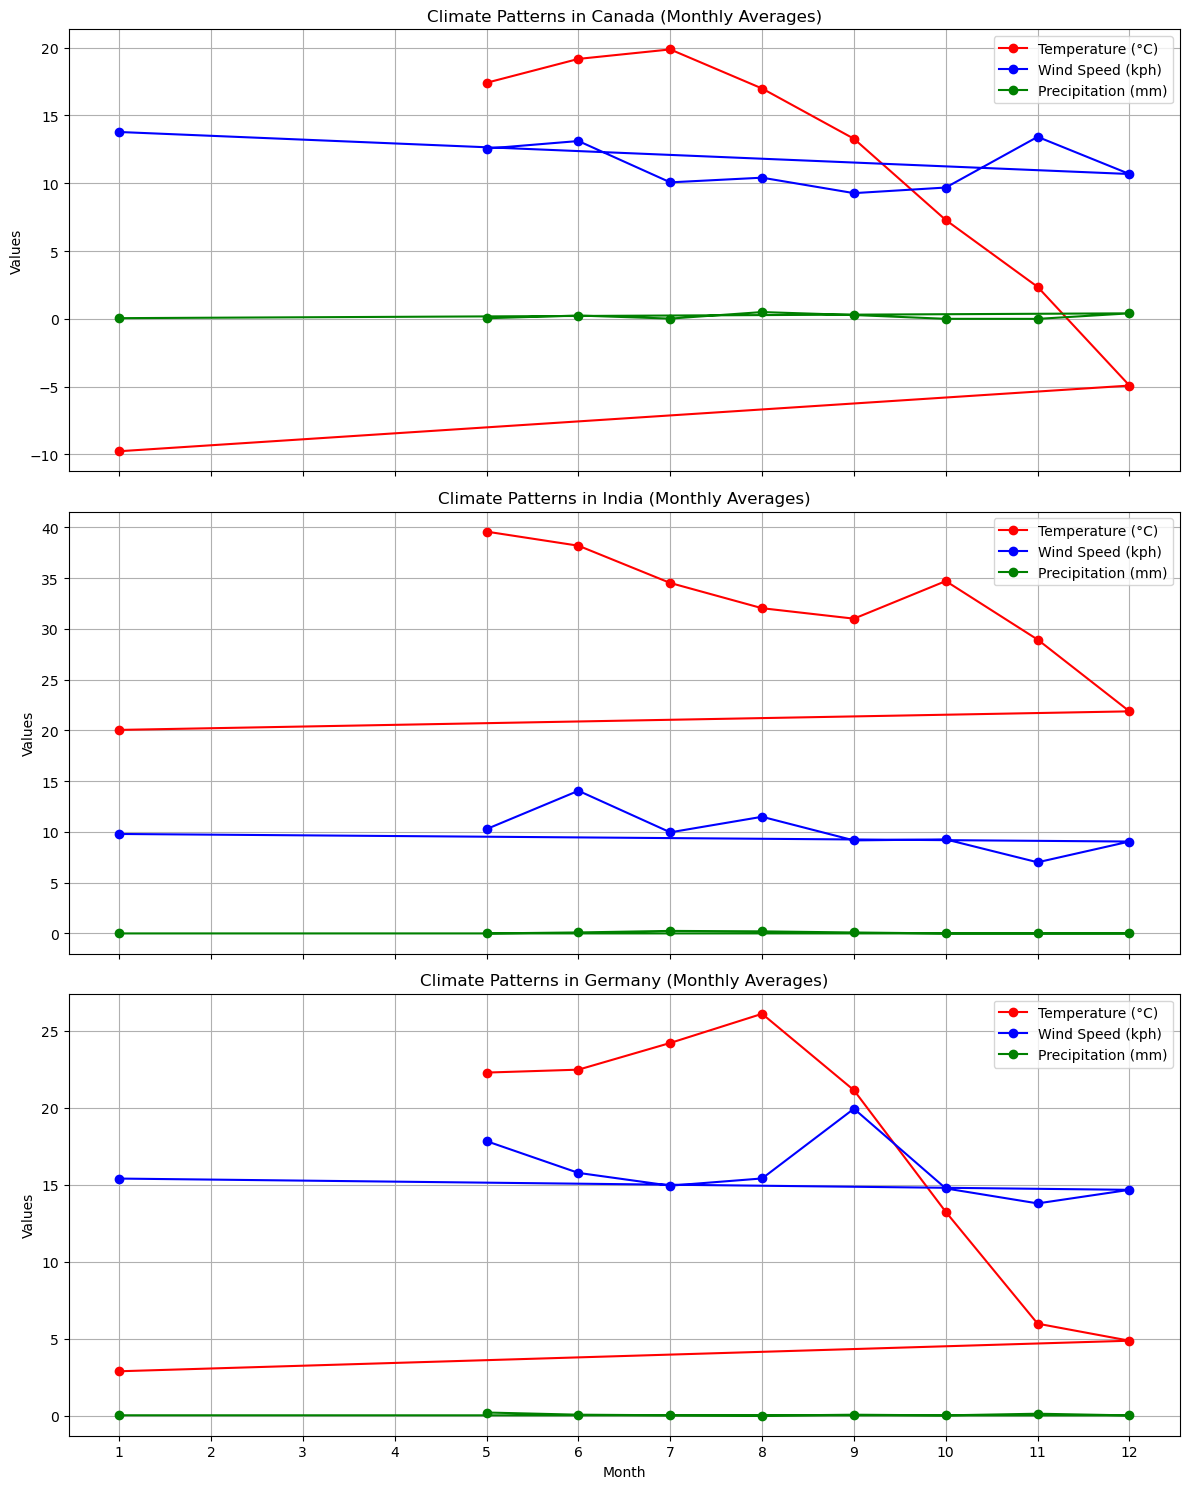

In [43]:

# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Extract month and year for aggregation
df['month'] = df['last_updated'].dt.month
df['year'] = df['last_updated'].dt.year

# Group by country, year, and month to analyze average temperature, wind, and precipitation
climate_data = df.groupby(['country', 'year', 'month'])[['temperature_celsius', 'wind_kph', 'precip_mm']].mean().reset_index()

# List of countries to analyze
countries = ['Canada', 'India', 'Germany']
colors = ['red', 'blue', 'green']  # Colors for the three variables

# Create a cumulative plot with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for i, country in enumerate(countries):
    country_data = climate_data[climate_data['country'] == country]

    axes[i].plot(country_data['month'], country_data['temperature_celsius'], marker='o', label='Temperature (°C)', color=colors[0])
    axes[i].plot(country_data['month'], country_data['wind_kph'], marker='o', label='Wind Speed (kph)', color=colors[1])
    axes[i].plot(country_data['month'], country_data['precip_mm'], marker='o', label='Precipitation (mm)', color=colors[2])

    axes[i].set_title(f"Climate Patterns in {country} (Monthly Averages)")
    axes[i].set_ylabel("Values")
    axes[i].legend()
    axes[i].grid(True)

# Set common x-axis label
plt.xlabel("Month")
plt.xticks(range(1, 13))  # Ensure month labels are clear
plt.tight_layout()

# Save the figure
plt.savefig("climate_analysis.png", dpi=300)
plt.show()


Analysis of Air quality and its correlation with various weather parameters (Advanced)


C:\Users\shaad\AppData\Local\Temp\ipykernel_16248\1054218929.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_updated'] = pd.to_datetime(data['last_updated'])
C:\Users\shaad\AppData\Local\Temp\ipykernel_16248\1054218929.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['last_updated'].dt.month


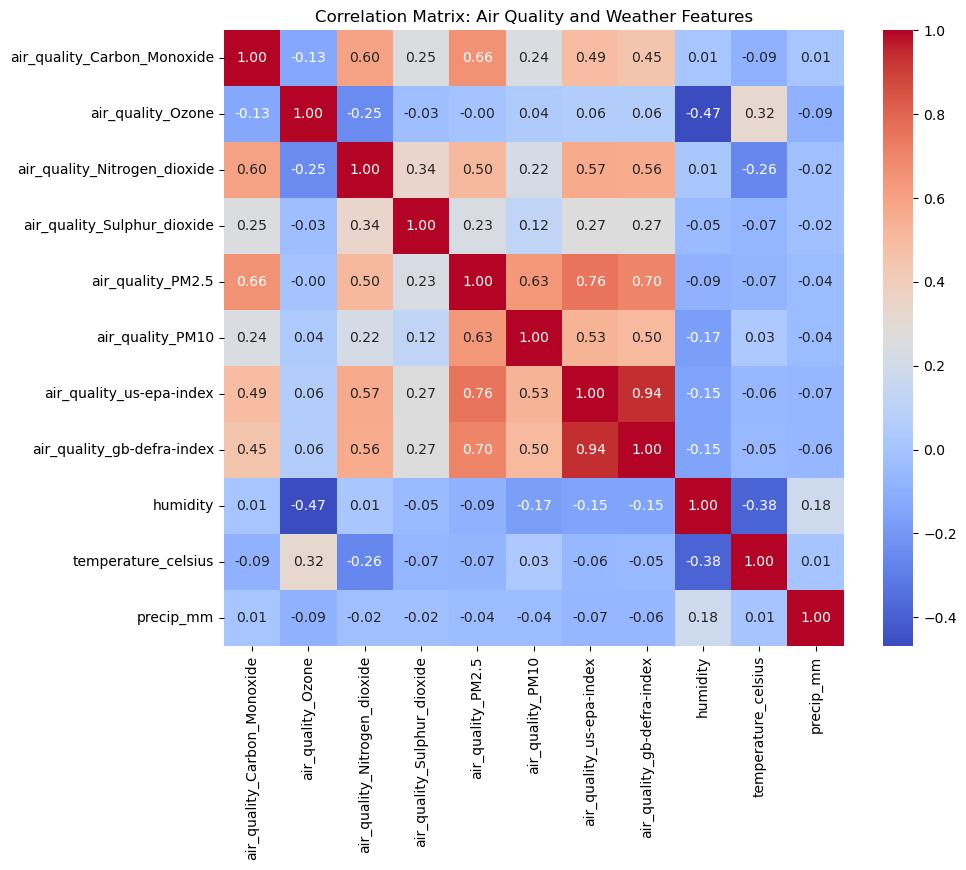

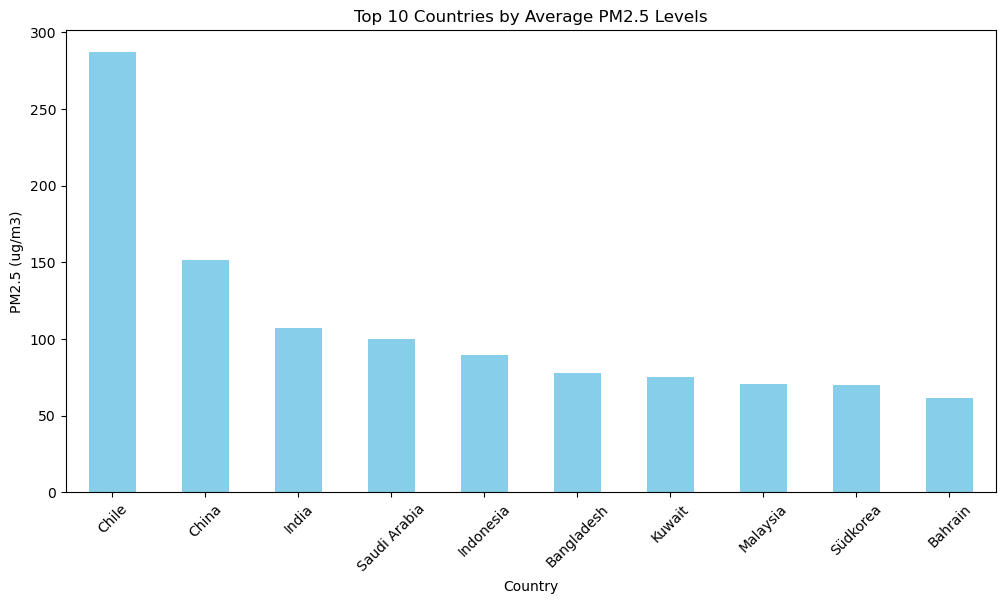

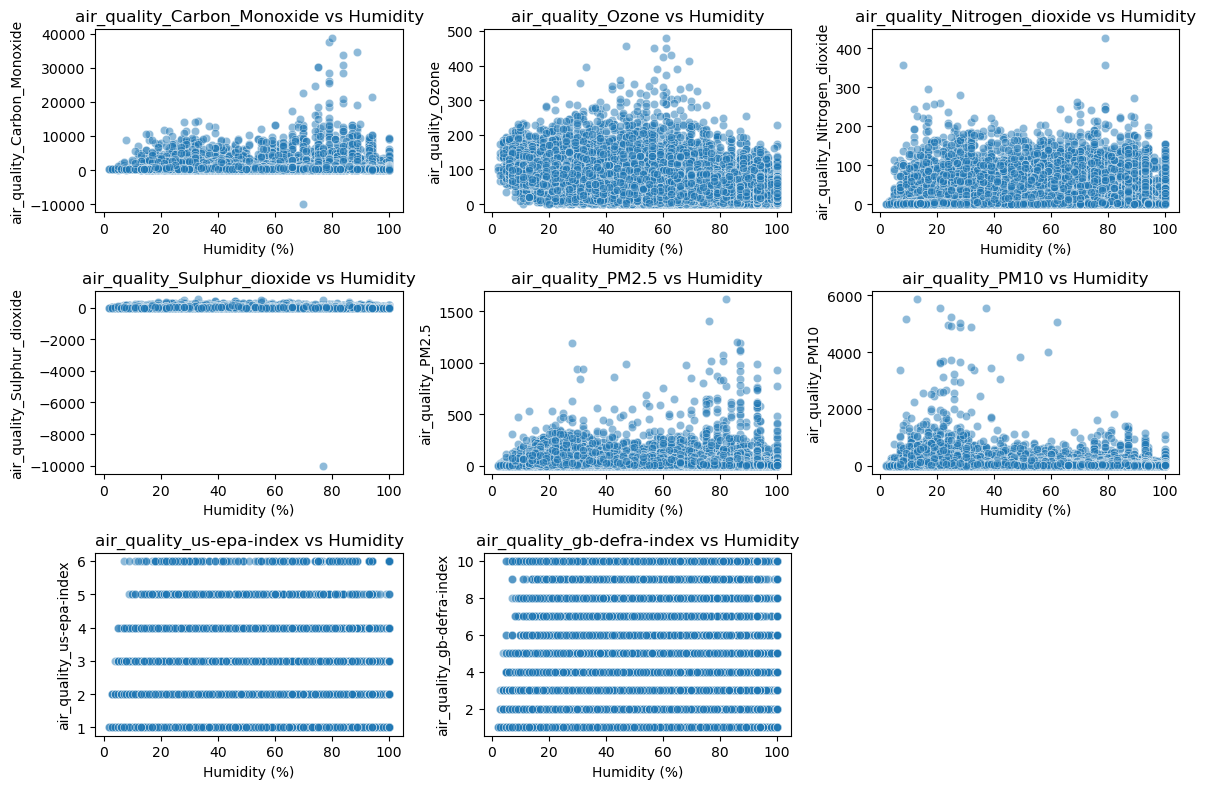

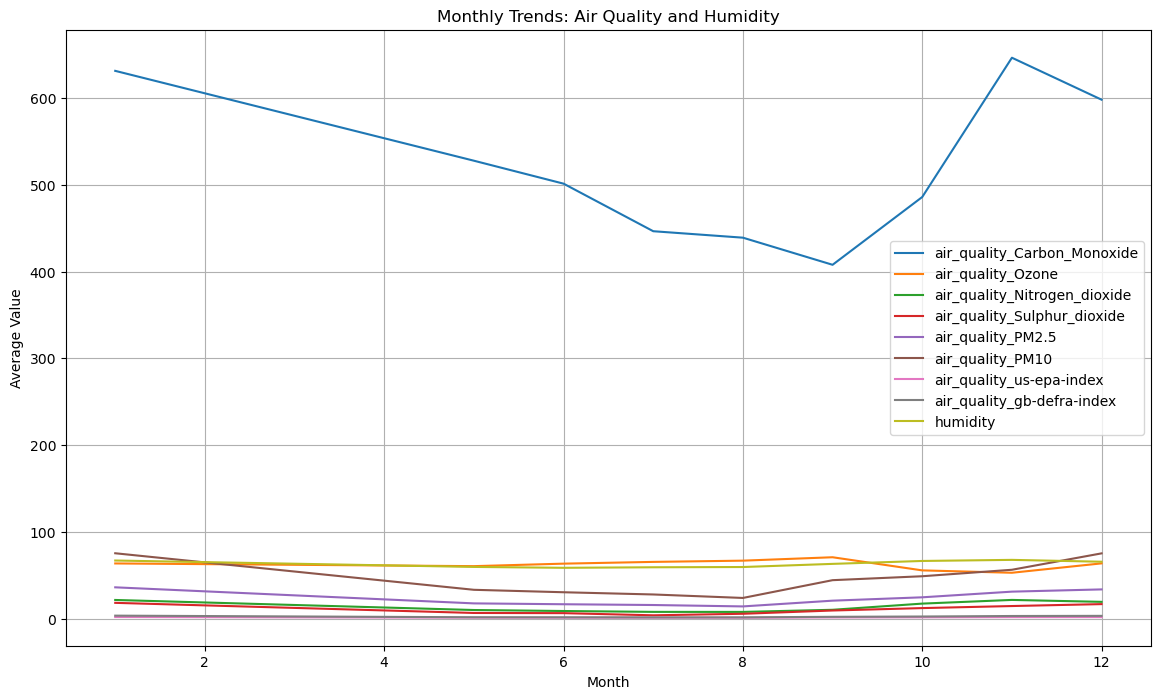

In [45]:


# Assuming your DataFrame is named 'df'
# Extract relevant columns for analysis
air_quality_columns = [
    "air_quality_Carbon_Monoxide",
    "air_quality_Ozone",
    "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "air_quality_us-epa-index",
    "air_quality_gb-defra-index",
]
weather_columns = ["humidity", "temperature_celsius", "precip_mm"]

# Filter required columns
data = df[air_quality_columns + weather_columns + ["country", "last_updated"]]

# Convert 'last_updated' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])
data['month'] = data['last_updated'].dt.month

# 1. Correlation Analysis
correlation_matrix = data[air_quality_columns + weather_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Air Quality and Weather Features")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Air Quality Analysis by Country
country_air_quality = data.groupby("country")[air_quality_columns].mean()
country_air_quality = country_air_quality.sort_values(by="air_quality_PM2.5", ascending=False)

plt.figure(figsize=(12, 6))
country_air_quality["air_quality_PM2.5"].head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Average PM2.5 Levels")
plt.ylabel("PM2.5 (ug/m3)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.savefig("top_10_countries_pm25.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Air Quality vs. Humidity
plt.figure(figsize=(12, 8))
for i, feature in enumerate(air_quality_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data['humidity'], y=data[feature], alpha=0.5)
    plt.title(f"{feature} vs Humidity")
    plt.xlabel("Humidity (%)")
    plt.ylabel(feature)
plt.tight_layout()
plt.savefig("air_quality_vs_humidity.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Monthly Trends: Air Quality and Humidity
monthly_data = data.groupby("month")[air_quality_columns + ["humidity"]].mean()
plt.figure(figsize=(14, 8))
for feature in air_quality_columns + ["humidity"]:
    sns.lineplot(data=monthly_data, x=monthly_data.index, y=feature, label=feature)
plt.title("Monthly Trends: Air Quality and Humidity")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.savefig("monthly_trends_air_quality_humidity.png", dpi=300, bbox_inches='tight')
plt.show()


Spatial Analysis: Analysis and visualization of geographical patterns in the data across countries. (Advanced assessment)

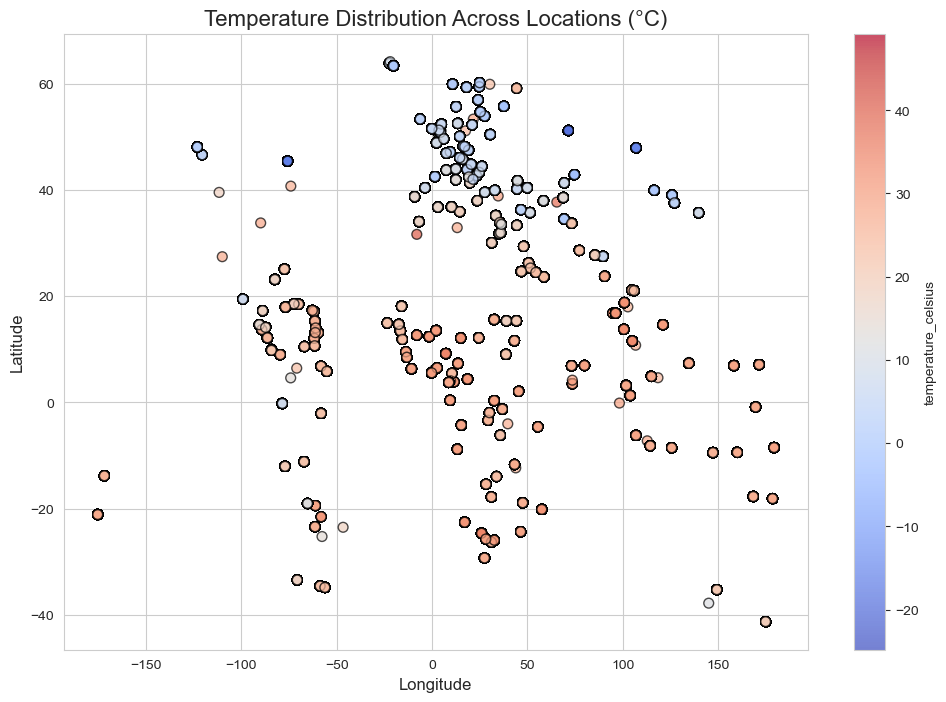

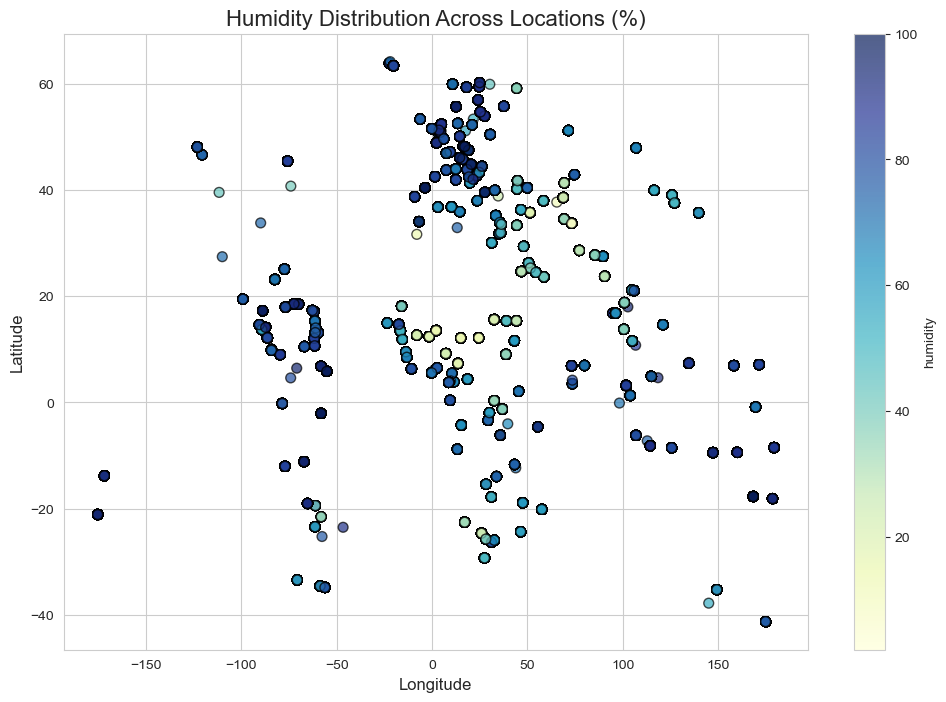

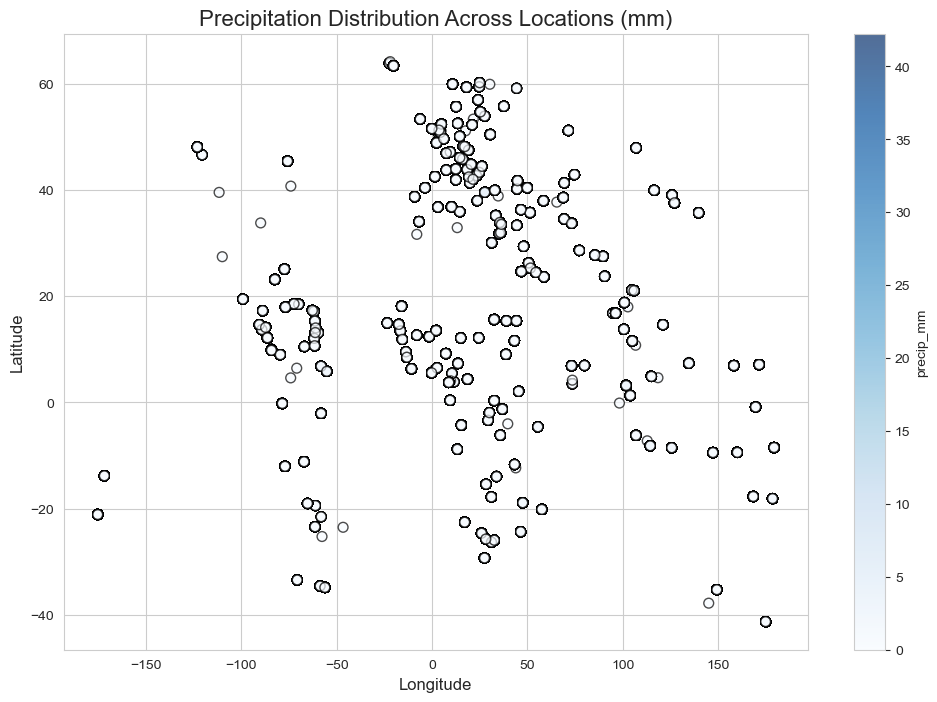

In [47]:


# Set the style for the plots
sns.set_style("whitegrid")

# Function to create a scatter plot for geographical analysis and save it
def plot_geographical_patterns(data, feature, title, save_path, cmap="viridis", marker_size=50):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot with latitude and longitude
    scatter = plt.scatter(
        data['longitude'], 
        data['latitude'], 
        c=data[feature], 
        cmap=cmap, 
        s=marker_size, 
        alpha=0.7, 
        edgecolor='k'
    )
    
    # Add color bar
    plt.colorbar(scatter, label=f"{feature}")
    
    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Example 1: Plot and save temperature patterns
plot_geographical_patterns(
    df, 
    feature="temperature_celsius", 
    title="Temperature Distribution Across Locations (°C)",
    save_path="temperature_distribution.png",
    cmap="coolwarm"
)

# Example 2: Plot and save humidity patterns
plot_geographical_patterns(
    df, 
    feature="humidity", 
    title="Humidity Distribution Across Locations (%)",
    save_path="humidity_distribution.png",
    cmap="YlGnBu"
)

# Example 3: Plot and save precipitation patterns
plot_geographical_patterns(
    df, 
    feature="precip_mm", 
    title="Precipitation Distribution Across Locations (mm)",
    save_path="precipitation_distribution.png",
    cmap="Blues"
)


Analysis of Geographical patterns variation across continents. (Advanced Assessment)


C:\Users\shaad\AppData\Local\Temp\ipykernel_16248\3369713505.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df_sampled, x='country', y='temperature_celsius', palette='coolwarm', showfliers=False, dodge=False)


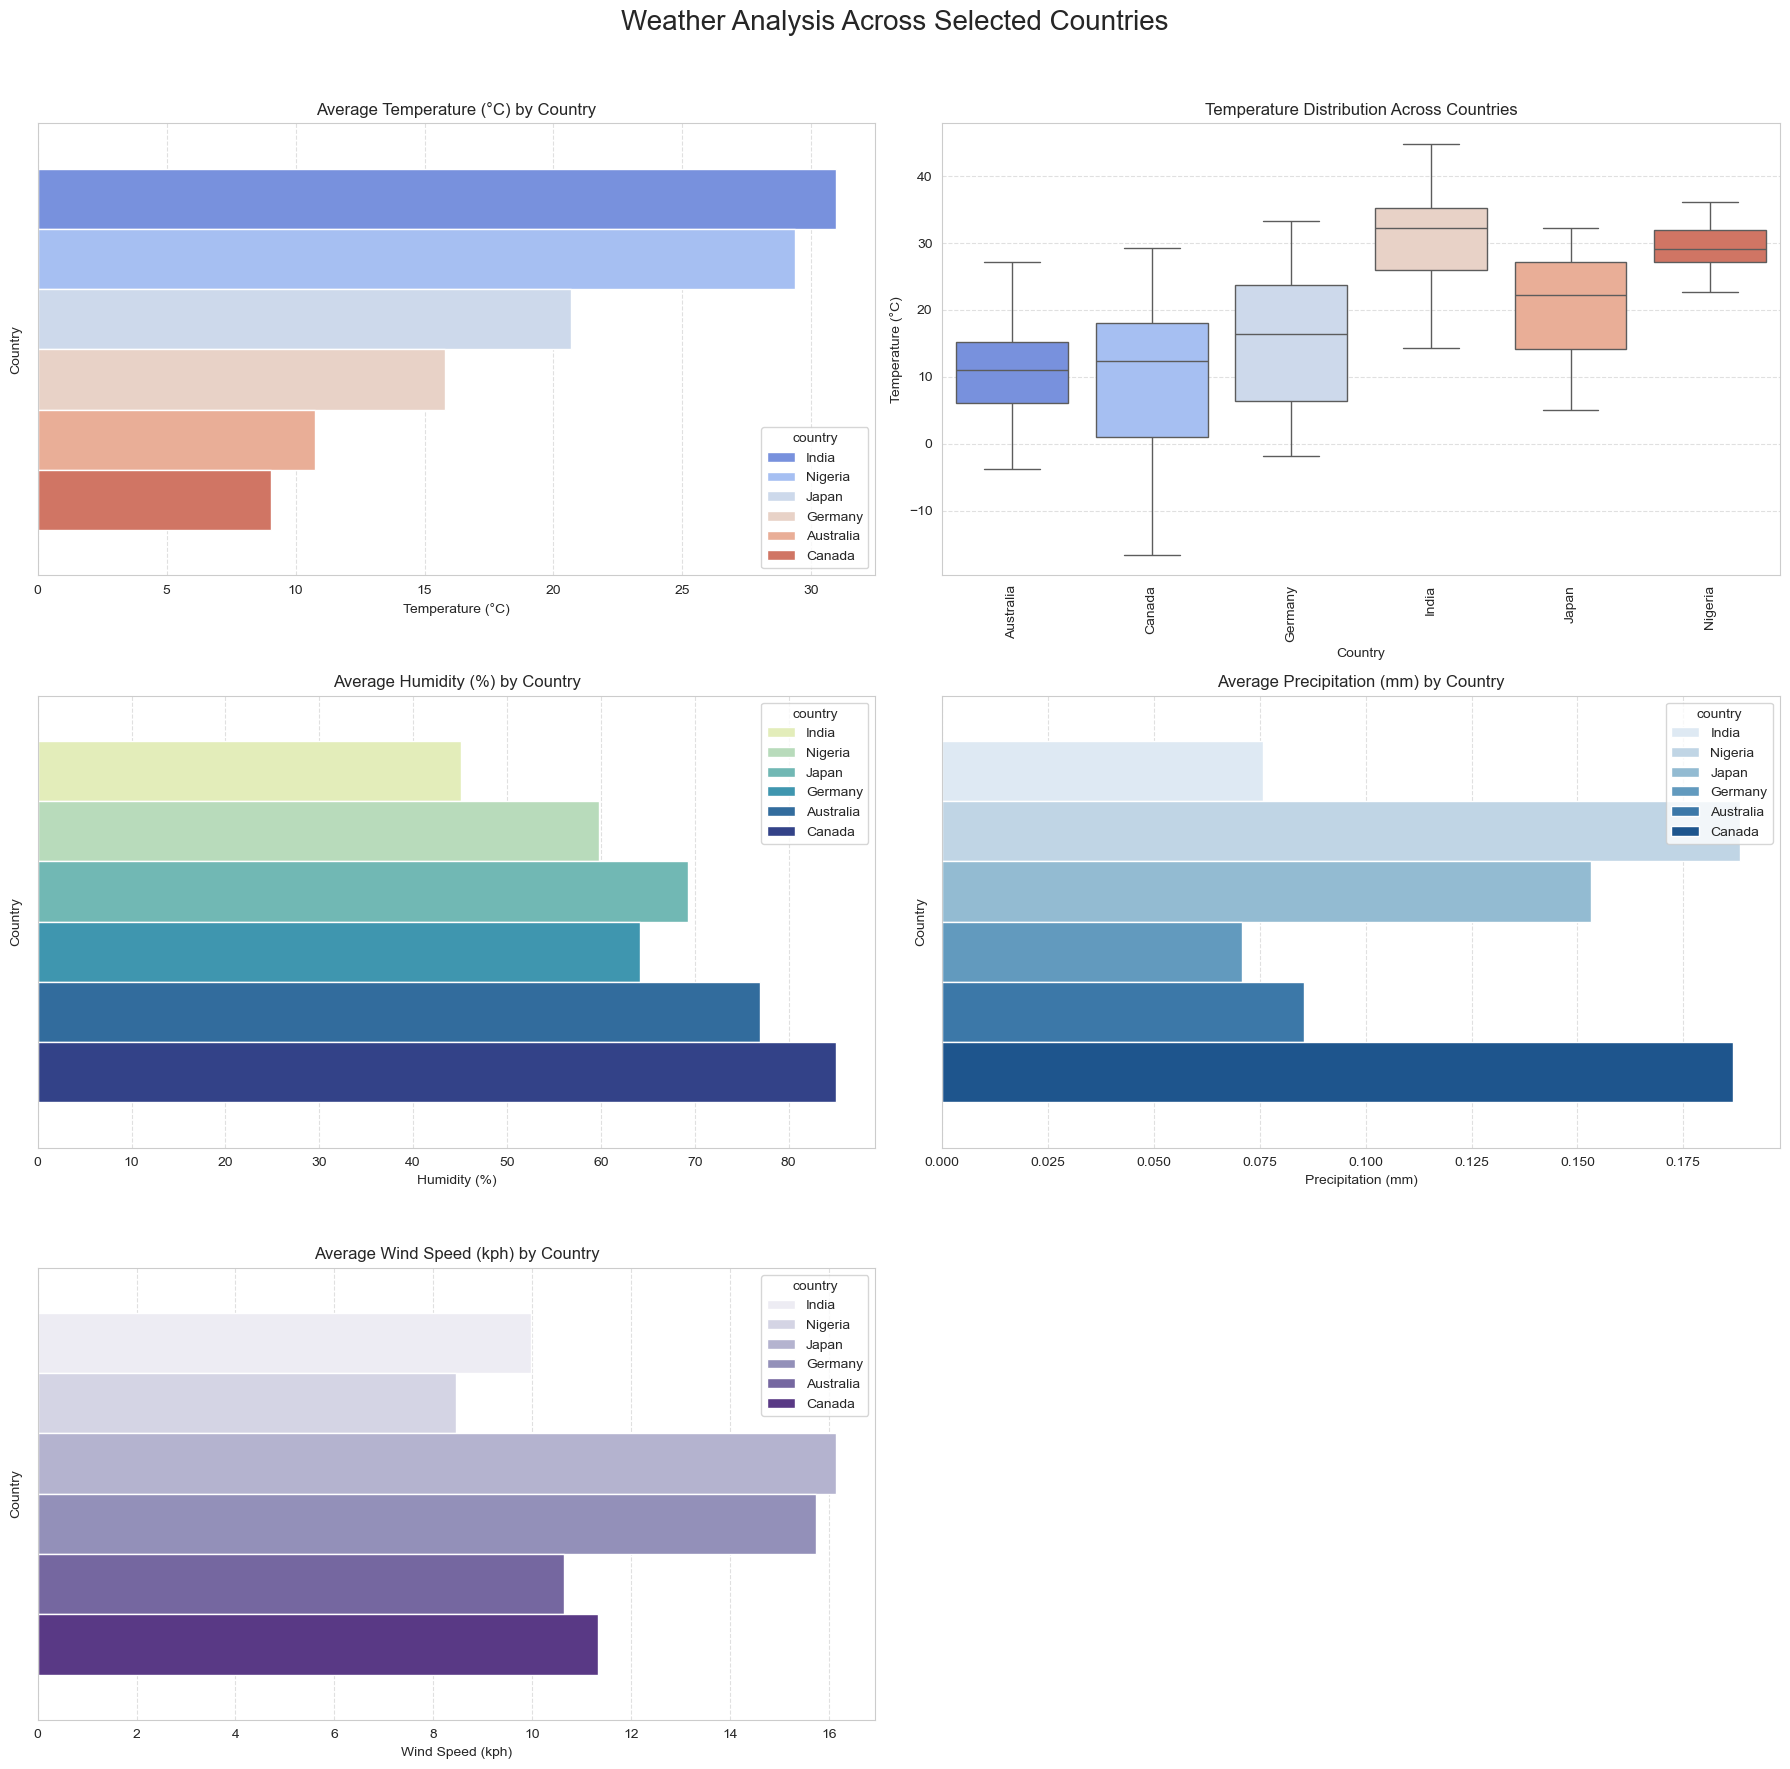

In [49]:


# Example DataFrame (replace with your data)
# Ensure 'country', 'temperature_celsius', 'humidity', 'precip_mm', 'wind_kph' columns exist in the DataFrame
# df = pd.read_csv("your_data.csv")  # Load your dataset

# Sample the data to include only 8 countries for clarity
sampled_countries = ['Canada', 'USA', 'England', 'Germany', 'Nigeria', 'India', 'Japan', 'Australia']
df_sampled = df[df['country'].isin(sampled_countries)]

# Aggregating data by country to compute mean weather conditions
country_weather = df_sampled.groupby('country').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'mean',
    'wind_kph': 'mean'
}).reset_index()

# Sort by temperature for better visualization
country_weather = country_weather.sort_values(by='temperature_celsius', ascending=False)

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns
fig.suptitle("Weather Analysis Across Selected Countries", fontsize=20)

# 1. Bar Plot for Average Temperature by Country
sns.barplot(ax=axes[0, 0], data=country_weather, x='temperature_celsius', hue='country', palette='coolwarm')
axes[0, 0].set_title("Average Temperature (°C) by Country")
axes[0, 0].set_xlabel("Temperature (°C)")
axes[0, 0].set_ylabel("Country")
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.6)
fig.savefig("temperature_distribution.png", dpi=300, bbox_inches='tight')

# 2. Box Plot for Temperature Distribution Across Countries
sns.boxplot(ax=axes[0, 1], data=df_sampled, x='country', y='temperature_celsius', palette='coolwarm', showfliers=False, dodge=False)
axes[0, 1].set_title("Temperature Distribution Across Countries")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Temperature (°C)")
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)
fig.savefig("temperature_distribution_boxplot.png", dpi=300, bbox_inches='tight')

# 3. Bar Plot for Humidity by Country
sns.barplot(ax=axes[1, 0], data=country_weather, x='humidity', hue='country', palette='YlGnBu')
axes[1, 0].set_title("Average Humidity (%) by Country")
axes[1, 0].set_xlabel("Humidity (%)")
axes[1, 0].set_ylabel("Country")
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.6)
fig.savefig("humidity_distribution.png", dpi=300, bbox_inches='tight')

# 4. Bar Plot for Precipitation by Country
sns.barplot(ax=axes[1, 1], data=country_weather, x='precip_mm', hue='country', palette='Blues')
axes[1, 1].set_title("Average Precipitation (mm) by Country")
axes[1, 1].set_xlabel("Precipitation (mm)")
axes[1, 1].set_ylabel("Country")
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.6)
fig.savefig("precipitation_distribution.png", dpi=300, bbox_inches='tight')

# 5. Bar Plot for Wind Speed by Country
sns.barplot(ax=axes[2, 0], data=country_weather, x='wind_kph', hue='country', palette='Purples')
axes[2, 0].set_title("Average Wind Speed (kph) by Country")
axes[2, 0].set_xlabel("Wind Speed (kph)")
axes[2, 0].set_ylabel("Country")
axes[2, 0].grid(axis='x', linestyle='--', alpha=0.6)
fig.savefig("wind_speed_distribution.png", dpi=300, bbox_inches='tight')

# Remove empty subplot (if odd number of plots)
fig.delaxes(axes[2, 1])

# Save the cumulative plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
fig.savefig("cumulative_weather_analysis.png", dpi=300, bbox_inches='tight')

# Show cumulative plot
plt.show()


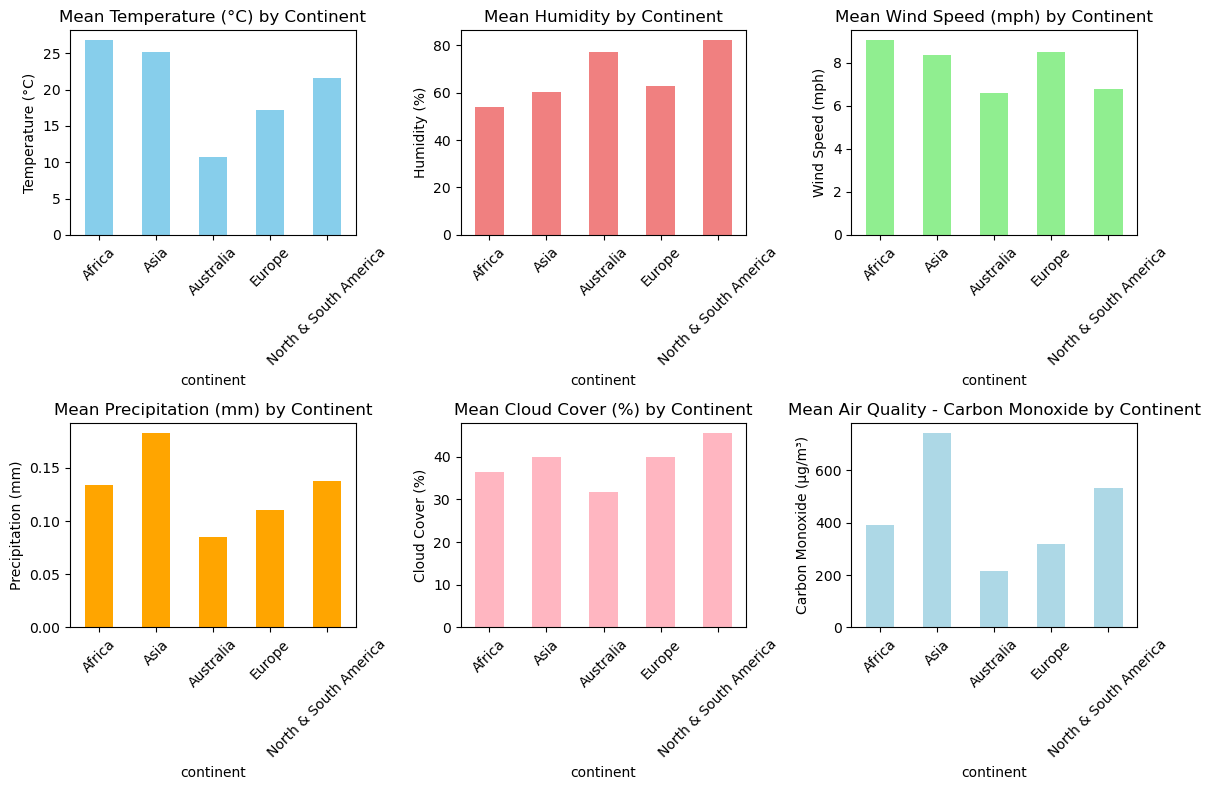

In [5]:
# Extract continent from the timezone column
df['continent'] = df['timezone'].str.split('/').str[0]

# Rename continent entries
df['continent'] = df['continent'].replace({
    'America': 'North & South America',
    'Indian': 'Asia',
    'Atlantic': 'Africa',
    'Pacific': 'Asia'
})

# Select the relevant columns for exploration
weather_columns = ['temperature_celsius', 'wind_mph', 'pressure_mb', 'precip_mm', 
                   'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 
                   'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                   'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
                   'air_quality_PM2.5', 'air_quality_PM10']

# Create a new dataframe with continent and selected weather columns
df_weather_continent = df[['continent'] + weather_columns]

# Group by continent and calculate statistics (mean)
continent_stats = df_weather_continent.groupby('continent').mean()

# Plotting the grouped statistics
plt.figure(figsize=(12, 8))

# Plotting the temperature across continents
plt.subplot(2, 3, 1)
continent_stats['temperature_celsius'].plot(kind='bar', color='skyblue')
plt.title('Mean Temperature (°C) by Continent')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# Plotting the humidity across continents
plt.subplot(2, 3, 2)
continent_stats['humidity'].plot(kind='bar', color='lightcoral')
plt.title('Mean Humidity by Continent')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

# Plotting the wind speed across continents
plt.subplot(2, 3, 3)
continent_stats['wind_mph'].plot(kind='bar', color='lightgreen')
plt.title('Mean Wind Speed (mph) by Continent')
plt.ylabel('Wind Speed (mph)')
plt.xticks(rotation=45)

# Plotting the precipitation across continents
plt.subplot(2, 3, 4)
continent_stats['precip_mm'].plot(kind='bar', color='orange')
plt.title('Mean Precipitation (mm) by Continent')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)

# Plotting the cloud cover across continents
plt.subplot(2, 3, 5)
continent_stats['cloud'].plot(kind='bar', color='lightpink')
plt.title('Mean Cloud Cover (%) by Continent')
plt.ylabel('Cloud Cover (%)')
plt.xticks(rotation=45)

# Plotting the air quality Carbon Monoxide across continents
plt.subplot(2, 3, 6)
continent_stats['air_quality_Carbon_Monoxide'].plot(kind='bar', color='lightblue')
plt.title('Mean Air Quality - Carbon Monoxide by Continent')
plt.ylabel('Carbon Monoxide (µg/m³)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Basic Forecasting model and evaluaion of its performance using different metrics.Usage of lastupdated feature for the time series analysis and using it as feature for prediction of target feature. 
Analysis of Feature Importance. (Advanced Asessment).


Decision Tree Model Performance:

Performance for temperature_celsius:
Mean Absolute Error (MAE): 3.38
Mean Squared Error (MSE): 21.18
Root Mean Squared Error (RMSE): 4.60
R-squared (R2): 0.75

Performance for precip_mm:
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.55
R-squared (R2): 0.06


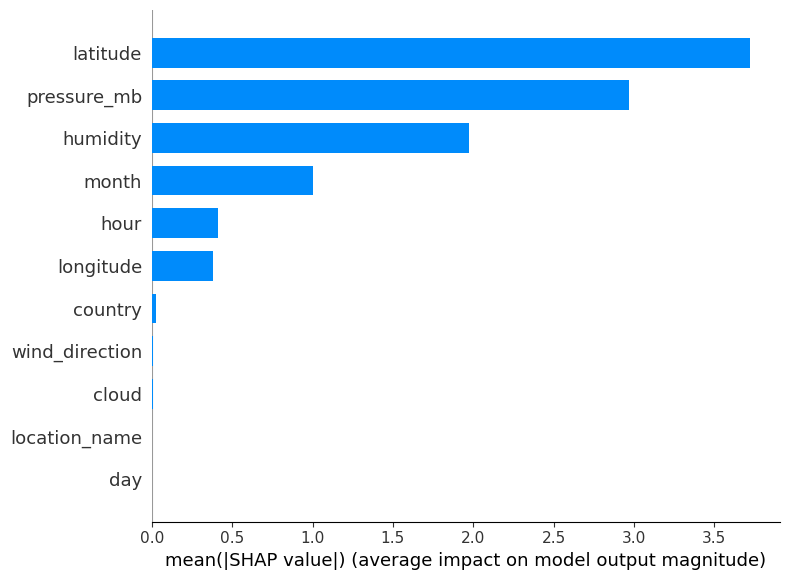

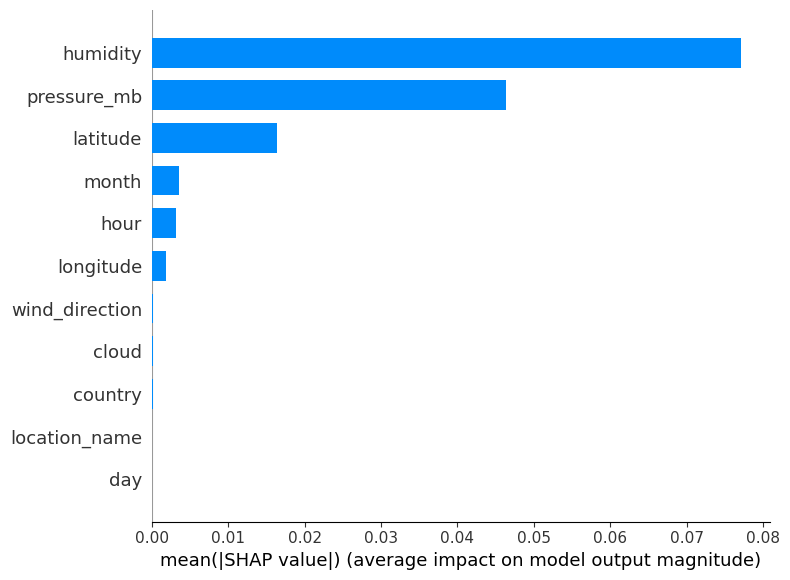

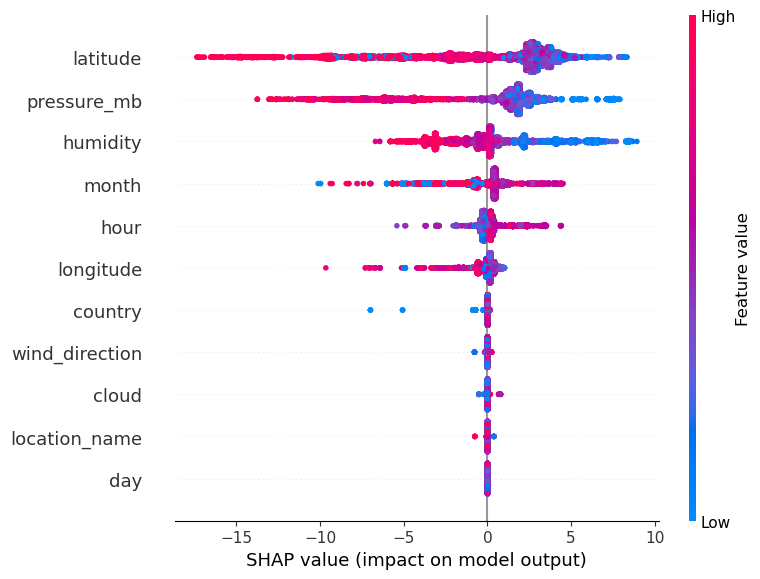

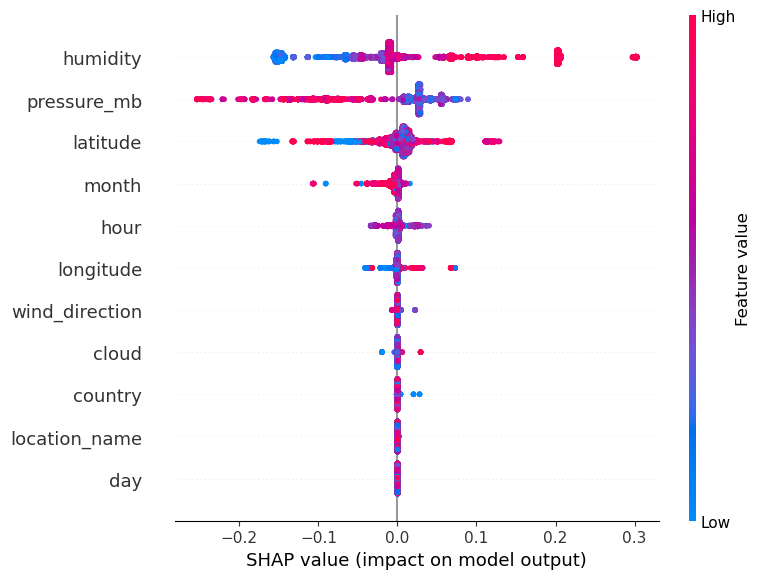

In [36]:
from sklearn.tree import DecisionTreeRegressor


# Targets
targets = ['temperature_celsius', 'precip_mm']

# Preprocess datetime feature
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['hour'] = df['last_updated'].dt.hour
df['day'] = df['last_updated'].dt.day
df['month'] = df['last_updated'].dt.month

# Define features
features = [
    'latitude', 'longitude', 'pressure_mb', 'humidity', 'cloud', 
    'hour', 'day', 'month', 'country', 'location_name', 'wind_direction'
]

# Encode categorical columns using LabelEncoder
categorical_features = ['country', 'location_name', 'wind_direction']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use if needed

# Define X (features) and Y (multi-output target)
X = df[features]
y = df[targets]

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model for multi-output regression
model = DecisionTreeRegressor(max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Performance:")
for i, target in enumerate(targets):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"\nPerformance for {target}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

# Apply SHAP for feature importance (FIXED)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Feature importance bar plot
plt.figure()
shap.summary_plot(shap_values[0], X_test, feature_names=features, plot_type="bar", show=True)  # For first target
plt.savefig("shap_summary_bar_temperature_celsius.png", bbox_inches="tight", dpi=300)  # Save plot for temperature
plt.close()

plt.figure()
shap.summary_plot(shap_values[1], X_test, feature_names=features, plot_type="bar", show=True)  # For second target
plt.savefig("shap_summary_bar_precip_mm.png", bbox_inches="tight", dpi=300)  # Save plot for precipitation
plt.close()

# SHAP summary plot for both targets
plt.figure()
shap.summary_plot(shap_values[0], X_test, feature_names=features, show=True)  # For temperature_celsius
plt.savefig("shap_summary_temperature_celsius.png", bbox_inches="tight", dpi=300)  # Save plot for temperature
plt.close()

plt.figure()
shap.summary_plot(shap_values[1], X_test, feature_names=features, show=True)  # For precip_mm
plt.savefig("shap_summary_precip_mm.png", bbox_inches="tight", dpi=300)  # Save plot for precipitation
plt.close()


Forecasting and comparison with multiple models

Outlier detection and normalization of data

In [38]:
# Handle Outliers (IQR Method)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [40]:
# Normalize Numerical Data
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Forecasting with multiple models as well as building the ensemble model xgboost to evaluate and compare performance

In [42]:



# Targets
targets = ['temperature_celsius', 'precip_mm']

# Preprocess datetime feature
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['hour'] = df['last_updated'].dt.hour
df['day'] = df['last_updated'].dt.day
df['month'] = df['last_updated'].dt.month

# Define the features
features = [
    'latitude', 'longitude', 'pressure_mb', 'humidity', 'cloud', 
    'hour', 'day', 'month', 'country', 'location_name', 'wind_direction'
]

# Encode categorical columns using LabelEncoder
categorical_features = ['country', 'location_name', 'wind_direction']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use if needed

# Define X (features) and Y (multi-output target)
X = df[features]
y = df[targets]

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models 
models = {
    "XGBoost": MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)),
    "Linear Regression": MultiOutputRegressor(LinearRegression()),
    "SVR": MultiOutputRegressor(SVR()),
    "Decision Tree": MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
}

# Train models, make predictions, and evaluate
for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_test[target], y_pred[:, i])
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test[target], y_pred[:, i])
        print(f"\n{model_name} Performance for {target}:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"R-squared (R2): {r2:.2f}")


Training and Evaluating XGBoost...

XGBoost Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.94

XGBoost Performance for precip_mm:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
R-squared (R2): 0.49

Training and Evaluating Linear Regression...

Linear Regression Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2): 0.51

Linear Regression Performance for precip_mm:
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R-squared (R2): 0.30

Training and Evaluating SVR...

SVR Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared (R2): 0.31

SVR Performance for precip_mm:
Mean Absolute Error (MA

Ensemble model building and performance evaluation


XGBoost Model Performance:

Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.94

Performance for precip_mm:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
R-squared (R2): 0.49

Linear Regression Model Performance:

Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2): 0.51

Performance for precip_mm:
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R-squared (R2): 0.30

SVR Model Performance:

Performance for temperature_celsius:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared (R2): 0.31

Performance for precip_mm:
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squar

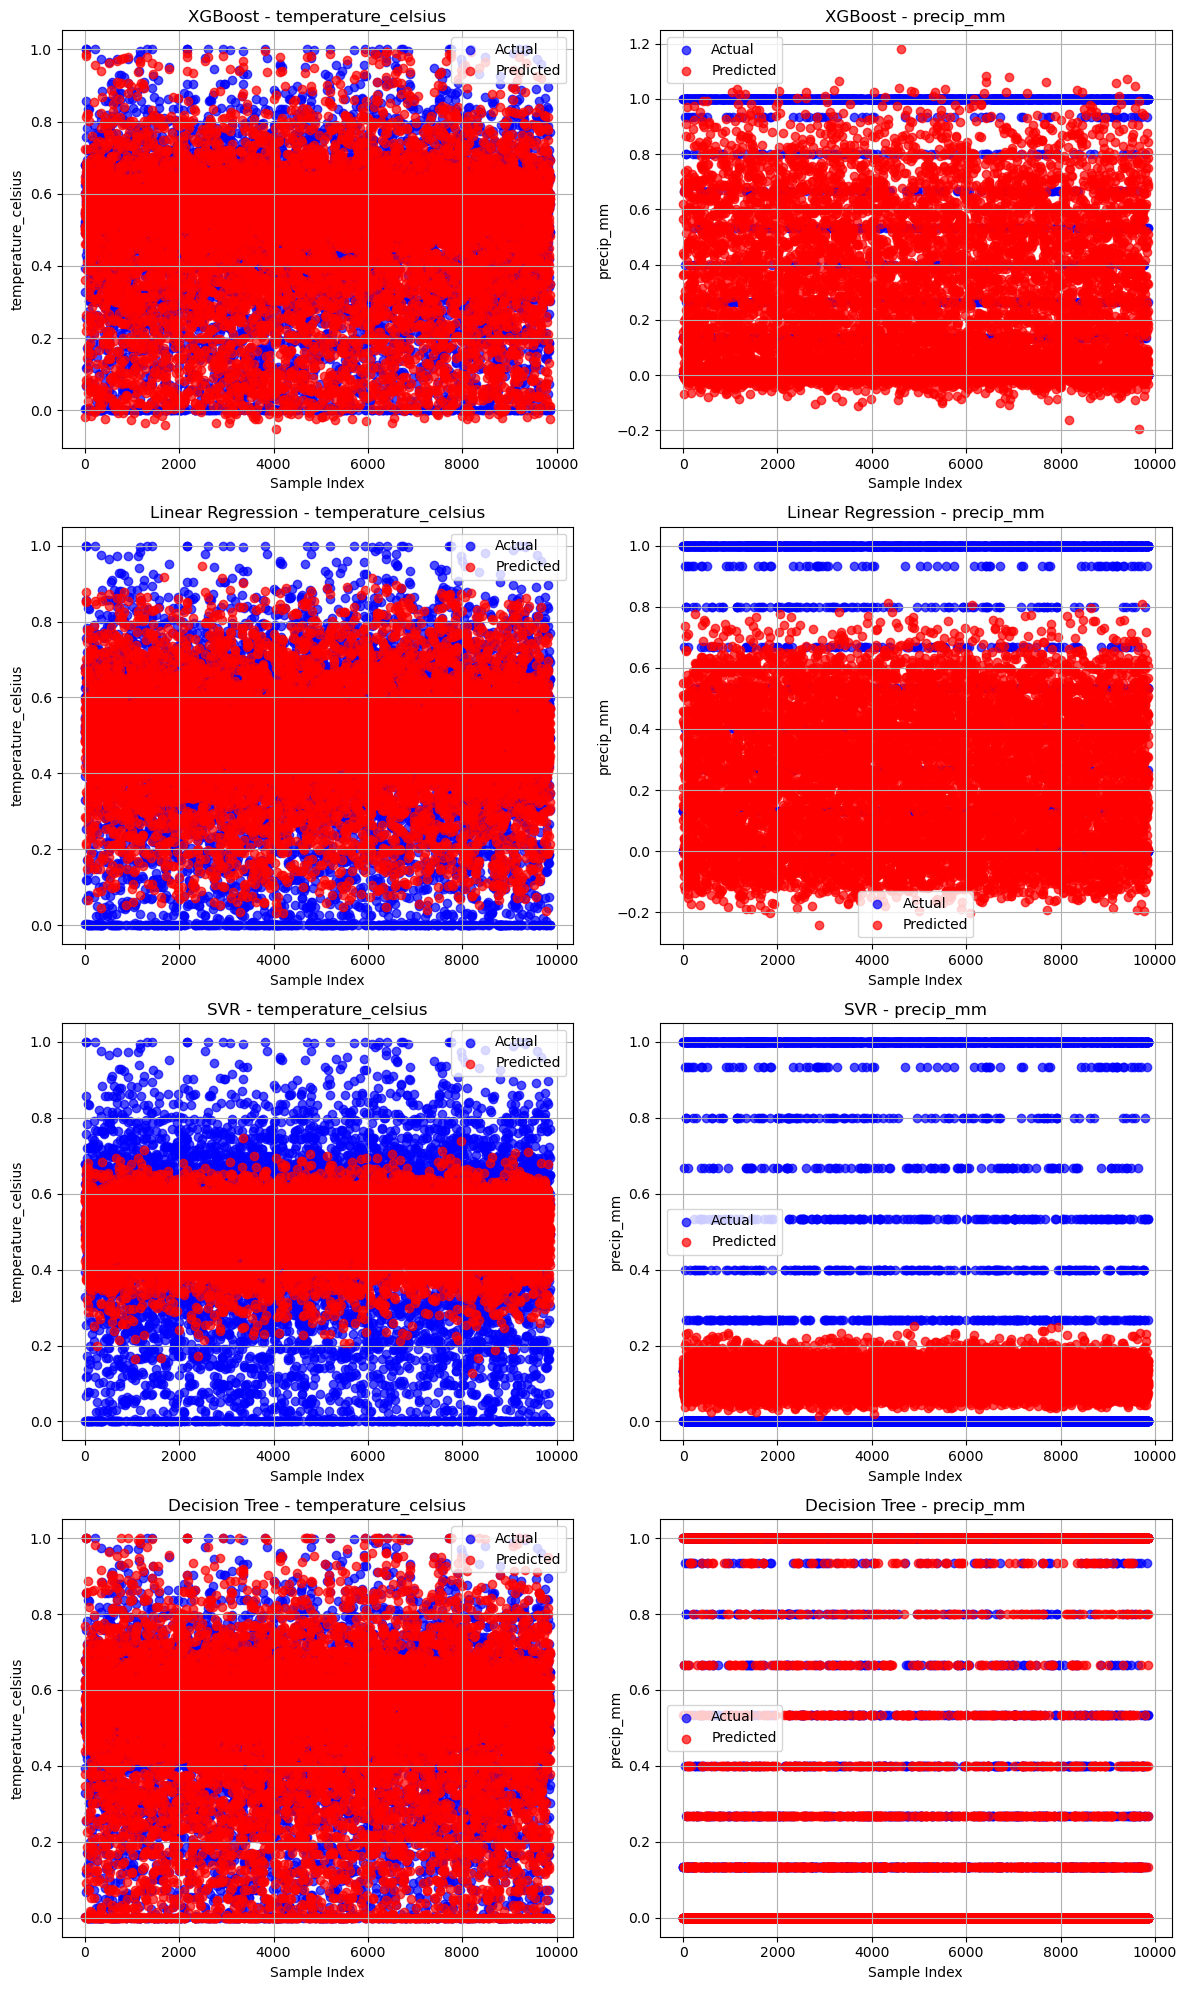

Cumulative plot saved as cumulative_predictions.png


In [43]:
# Function to plot predictions vs actual values (Cumulative plot)
def plot_cumulative_predictions(y_test, y_pred_dict, targets, save_path="cumulative_predictions.png"):
    num_models = len(y_pred_dict)
    num_targets = len(targets)

    fig, axes = plt.subplots(num_models, num_targets, figsize=(6 * num_targets, 5 * num_models))

    if num_models == 1 and num_targets == 1:
        axes = np.array([[axes]])  # Ensure 2D array
    elif num_models == 1:
        axes = np.array([axes])
    elif num_targets == 1:
        axes = np.array([[ax] for ax in axes])

    for i, (model_name, y_pred) in enumerate(y_pred_dict.items()):
        for j, target in enumerate(targets):
            ax = axes[i, j]
            ax.scatter(range(len(y_test[target])), y_test[target], label="Actual", alpha=0.7, color='blue')
            ax.scatter(range(len(y_pred[:, j])), y_pred[:, j], label="Predicted", alpha=0.7, color='red')
            ax.set_title(f"{model_name} - {target}")
            ax.set_xlabel("Sample Index")
            ax.set_ylabel(target)
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()
    fig.savefig(save_path, bbox_inches="tight", dpi=300)
    print(f"Cumulative plot saved as {save_path}")

# Dictionary to store predictions
y_pred_dict = {}

# Evaluate and store predictions for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_dict[model_name] = y_pred  # Store predictions for cumulative plot

    print(f"\n{model_name} Model Performance:")
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_test[target], y_pred[:, i])
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test[target], y_pred[:, i])
        print(f"\nPerformance for {target}:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"R-squared (R2): {r2:.2f}")

# Generate and save the cumulative plot
plot_cumulative_predictions(y_test, y_pred_dict, targets, save_path="cumulative_predictions.png")


In [46]:
# Performance metrics for each model and target
performance_data = {
    "Model": [
        "XGBoost (Ensemble learning model)", "XGBoost (Ensemble learning model)", 
        "Linear Regression", "Linear Regression", 
        "SVR", "SVR", 
        "Decision Tree", "Decision Tree"
    ],
    "Target": [
        "temperature_celsius", "precip_mm", 
        "temperature_celsius", "precip_mm", 
        "temperature_celsius", "precip_mm", 
        "temperature_celsius", "precip_mm"
    ],
    "MAE": [0.04, 0.19, 0.11, 0.26, 0.13, 0.26, 0.04, 0.20],
    "MSE": [0.00, 0.08, 0.02, 0.11, 0.03, 0.16, 0.00, 0.16],
    "RMSE": [0.05, 0.29, 0.14, 0.33, 0.17, 0.40, 0.06, 0.40],
    "R-squared": [0.94, 0.49, 0.51, 0.30, 0.31, -0.02, 0.92, -0.00]
}


# Create a DataFrame from the performance data
performance_df = pd.DataFrame(performance_data)

# Rank models based on R-squared (you can change this to MAE or another metric if needed)
performance_df['Rank'] = performance_df.groupby('Target')['R-squared'].rank(ascending=False, method='min')

# Sort by target and rank for easier visualization
performance_df_sorted = performance_df.sort_values(by=['Target', 'Rank'])

# Display the rankings
print("Model Rankings for Each Target Based on R-squared:")
for target in performance_df_sorted['Target'].unique():
    print(f"\nFor {target}:")
    target_df = performance_df_sorted[performance_df_sorted['Target'] == target]
    for index, row in target_df.iterrows():
        print(f"Rank {int(row['Rank'])}: {row['Model']}")
        print(f"R-squared: {row['R-squared']:.2f}, MAE: {row['MAE']:.2f}, MSE: {row['MSE']:.2f}, RMSE: {row['RMSE']:.2f}")


Model Rankings for Each Target Based on R-squared:

For precip_mm:
Rank 1: XGBoost (Ensemble learning model)
R-squared: 0.49, MAE: 0.19, MSE: 0.08, RMSE: 0.29
Rank 2: Linear Regression
R-squared: 0.30, MAE: 0.26, MSE: 0.11, RMSE: 0.33
Rank 3: Decision Tree
R-squared: -0.00, MAE: 0.20, MSE: 0.16, RMSE: 0.40
Rank 4: SVR
R-squared: -0.02, MAE: 0.26, MSE: 0.16, RMSE: 0.40

For temperature_celsius:
Rank 1: XGBoost (Ensemble learning model)
R-squared: 0.94, MAE: 0.04, MSE: 0.00, RMSE: 0.05
Rank 2: Decision Tree
R-squared: 0.92, MAE: 0.04, MSE: 0.00, RMSE: 0.06
Rank 3: Linear Regression
R-squared: 0.51, MAE: 0.11, MSE: 0.02, RMSE: 0.14
Rank 4: SVR
R-squared: 0.31, MAE: 0.13, MSE: 0.03, RMSE: 0.17
